In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data_np = np.load('X_train.npy')
df = pd.DataFrame(data_np)
print(df.head())

    0    1    2    3    4    5    6    7    8    9    ...  101  102  103  104  \
0  57.0  5.0  0.0  0.0  0.0  2.0  NaN  2.0  0.0  NaN  ...  3.0  0.0  0.0  3.0   
1  71.0  2.0  2.0  NaN  NaN  2.0  NaN  3.0  0.0  7.0  ...  5.0  NaN  NaN  4.0   
2  64.0  2.0  0.0  NaN  NaN  2.0  NaN  2.0  0.0  1.0  ...  4.0  0.0  3.0  2.0   
3  74.0  1.0  1.0  6.0  2.0  2.0  NaN  2.0  0.0  NaN  ...  4.0  0.0  3.0  3.0   
4  74.0  2.0  0.0  6.0  2.0  0.0  NaN  3.0  0.0  7.0  ...  6.0  0.0  5.0  4.0   

   105  106  107  108  109  110  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 111 columns]


In [7]:
data_y = np.load('y_train.npy')
df_y = pd.DataFrame(data_np)
print(df_y.head())

   0   1   2   3   4   5   6   7   8   9   10
0   1   0   0   0   0   0   0   0   0   0   0
1   0   0   0   1   1   1   1   0   0   0   0
2   1   0   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   1   1   1   1
4   0   0   0   0   0   0   0   0   0   1   0


     Missing Count  Missing Percentage
0                5                 0.5
1                0                 0.0
2                2                 0.2
3               67                 6.7
4               46                 4.6
..             ...                 ...
106              5                 0.5
107              8                 0.8
108              8                 0.8
109              7                 0.7
110              7                 0.7

[111 rows x 2 columns]


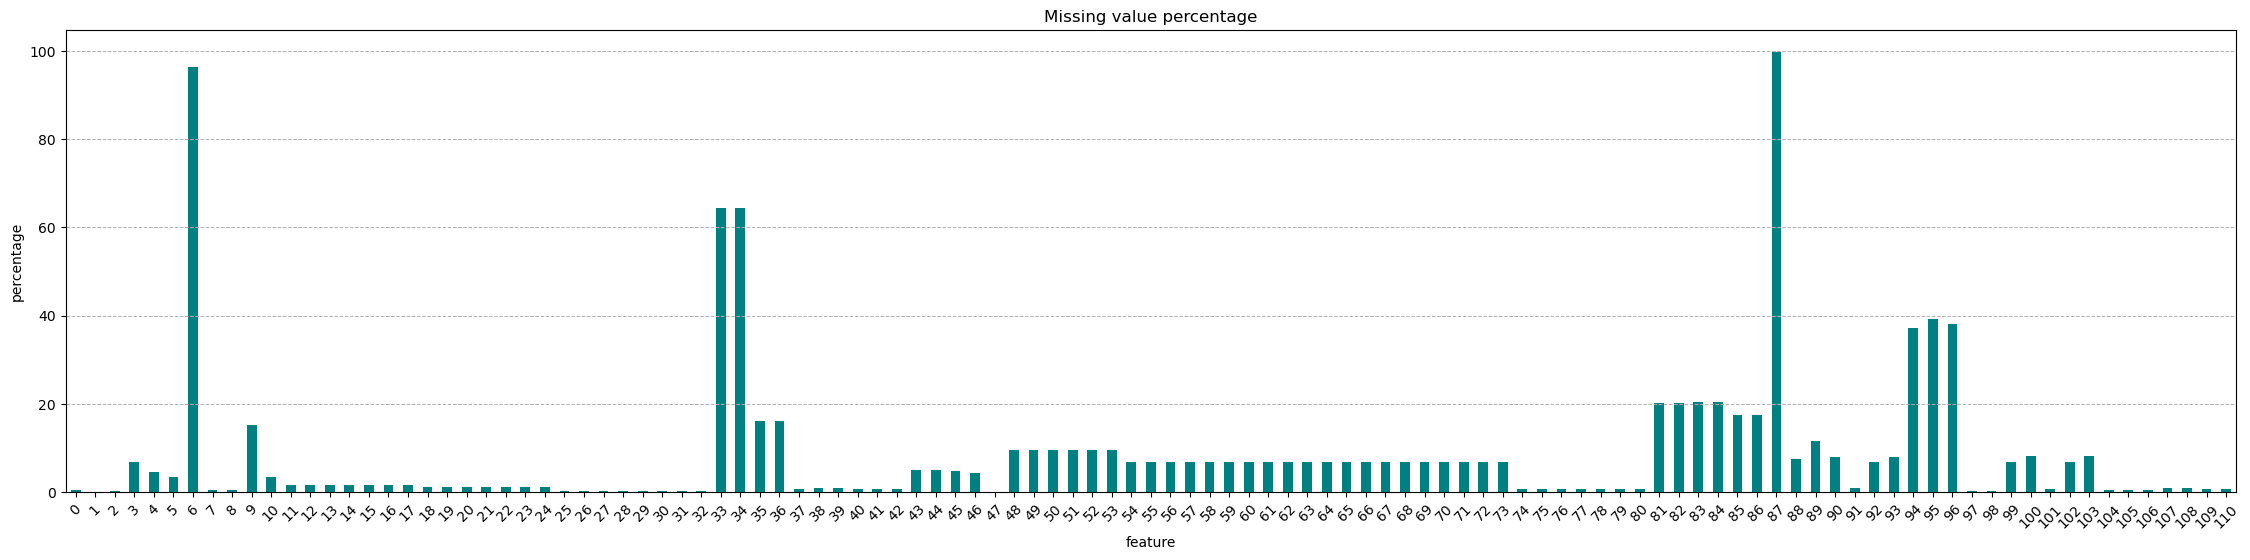

In [4]:
data_np = np.load('X_train.npy')
df = pd.DataFrame(data_np)

# 计算缺失值数量和百分比
missing_count = df.isnull().sum()  # 缺失值数量
total_count = df.shape[0]  # 总行数
missing_percentage = (missing_count / total_count) * 100  # 缺失值百分比

# 创建一个包含缺失值统计的DataFrame
missing_stats = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

print(missing_stats)

# 绘制柱状图
plt.figure(figsize=(28, 6))
missing_percentage.plot(kind='bar', color='teal')
plt.title('Missing value percentage')
plt.xlabel('feature')
plt.ylabel('percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

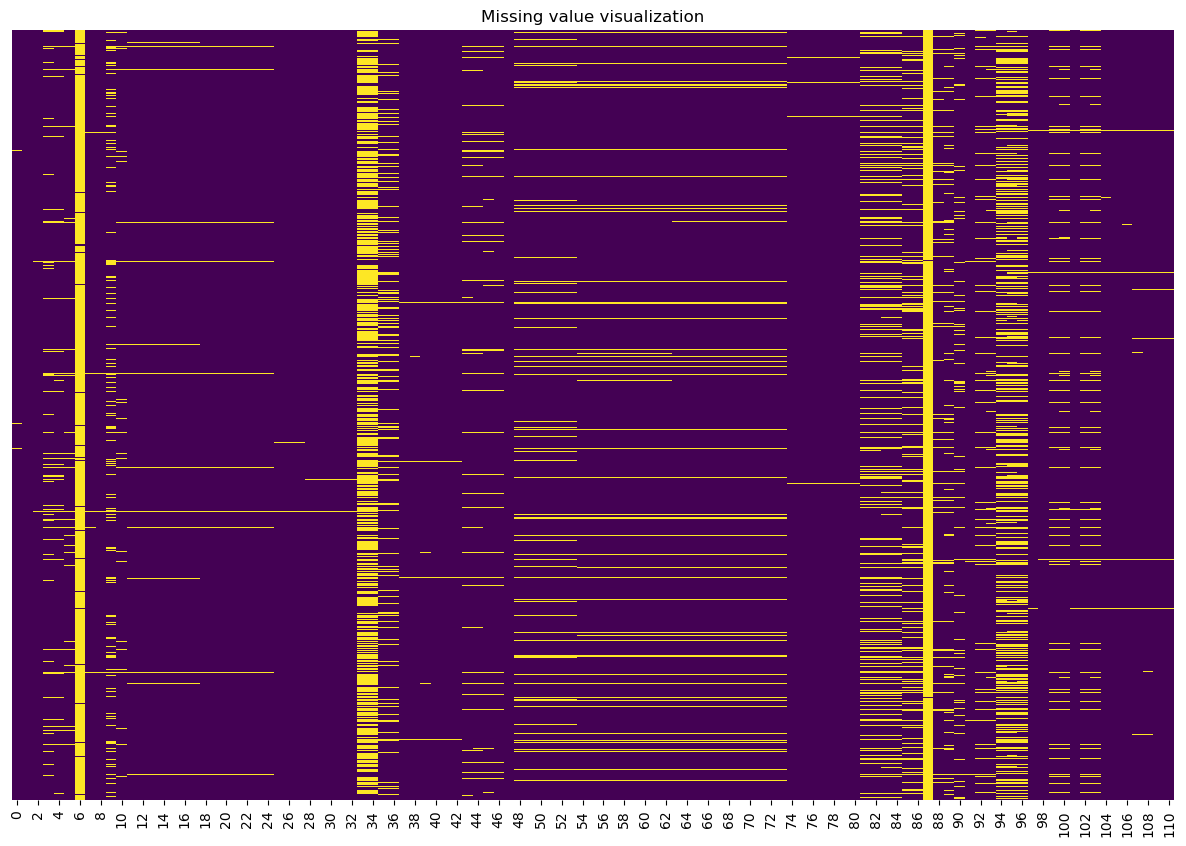

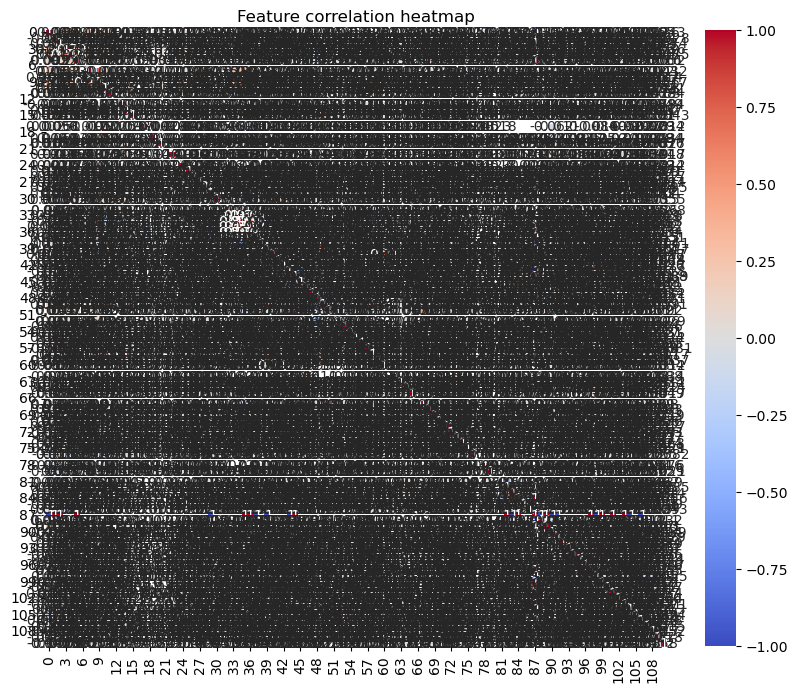

In [ ]:
data_np = np.load('X_train.npy')
df = pd.DataFrame(data_np)

# 缺失值可视化
plt.figure(figsize=(15, 10))
# plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value visualization')
plt.show()

# 相关性热图
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature correlation heatmap')
plt.show()


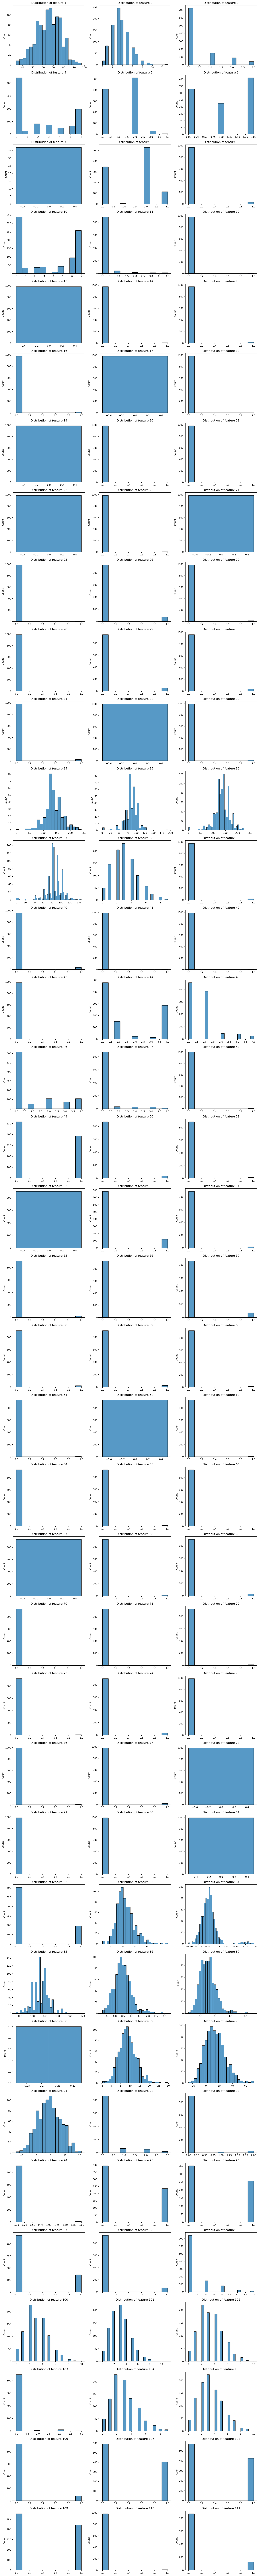

In [7]:
data_np = np.load('X_train.npy')
df = pd.DataFrame(data_np)

# 特征分布可视化
feature_count = df.shape[1]
rows = feature_count // 3 + 1 if feature_count % 3 else feature_count // 3
cols = 3

plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution of feature {col+1}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [26]:
# 假设你已经加载了X_train为Pandas DataFrame
data_np = np.load('X_train.npy')
X_train = pd.DataFrame(data_np)

# 初始化列表
unary_features = []
binary_features = []
multiclass_discrete_features = []
multiclass_continuous_features = []

# 设置连续特征的唯一值数量阈值
# 这个阈值可以根据数据集的具体情况进行调整
continuous_threshold = X_train.shape[0] * 0.05  # 假设连续特征至少有1%的唯一值

# 遍历每一列
for column in X_train.columns:
    unique_values = X_train[column].dropna().unique()  # 排除NaN值，获取唯一值列表
    unique_count = len(unique_values)  # 计算唯一值的数量
    
    if unique_count == 1:
        unary_features.append(column+1)
    elif unique_count == 2:
        binary_features.append(column+1)
    elif unique_count > 2:
        # 区分离散和连续特征
        if unique_count > continuous_threshold:
            multiclass_continuous_features.append(column+1)
        else:
            multiclass_discrete_features.append(column+1)

# 输出结果
print("一元特征值:", unary_features)#舍去
print("二元特征值:", binary_features)#比例
print("多元离散特征值:", multiclass_discrete_features)#众数
print("多元连续特征值:", multiclass_continuous_features)#均值


一元特征值: [7, 13, 17, 19, 22, 24, 32, 52, 62, 67, 78, 81]
二元特征值: [9, 12, 14, 15, 16, 18, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 33, 39, 40, 41, 42, 43, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 82, 88, 95, 96, 97, 98, 106, 107, 108, 109, 110, 111]
多元离散特征值: [2, 3, 4, 5, 6, 8, 10, 11, 34, 38, 44, 45, 46, 47, 83, 85, 92, 93, 94, 99, 100, 101, 102, 103, 104, 105]
多元连续特征值: [1, 35, 36, 37, 84, 86, 87, 89, 90, 91]


In [25]:
# 计算缺失值数量和百分比
missing_count = X_train.isnull().sum()  # 缺失值数量
total_count = X_train.shape[0]  # 总行数
missing_percentage = (missing_count / total_count) * 100  # 缺失值百分比

# 创建一个包含缺失值统计的DataFrame
missing_stats = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# 剔除缺失值大于80%的特征
df = df.loc[:, missing_percentage <= 80]

# # 标记出缺失值大于50%的特征
# features_missing_over_80 = missing_percentage[missing_percentage > 80].index.tolist()

# 标记出缺失值大于50%的特征
features_missing_over_50 = missing_percentage[missing_percentage > 50].index.tolist()

# 标记出缺失值大于5%的特征
features_missing_over_5 = missing_percentage[(missing_percentage > 5) & (missing_percentage <= 50)].index.tolist()

# 输出标记的特征列表
print("缺失值大于50%的特征:", features_missing_over_50)
print("缺失值大于5%且小于等于50%的特征:", features_missing_over_5)


缺失值大于50%的特征: [6, 33, 34, 87]
缺失值大于5%且小于等于50%的特征: [3, 9, 35, 36, 43, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92, 93, 94, 95, 96, 99, 100, 102, 103]


In [21]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from numpy.random import choice

# data_np = np.load('X_train.npy')
# X_train = pd.DataFrame(data_np)

# # 分类特征列的索引列表
# binary_features = []  # 填入二元特征的索引
# multiclass_discrete_features = []  # 填入多元离散特征的索引
# multiclass_continuous_features = []  # 填入多元连续特征的索引

# 处理二元特征值：按比例填充缺失值，并处理为0和1
for column in binary_features:
    values, counts = np.unique(X_train[column].dropna(), return_counts=True)
    probs = counts / counts.sum()
    X_train[column].fillna(choice(values, p=probs), inplace=True)
    X_train[column] = (X_train[column] == values[1]).astype(int)

# 处理多元离散特征值：使用众数填充缺失值，应用独热编码
if multiclass_discrete_features:
    imputer = SimpleImputer(strategy='most_frequent')
    X_train[multiclass_discrete_features] = imputer.fit_transform(X_train[multiclass_discrete_features])

    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[multiclass_discrete_features])
    # 注意: 对于独热编码后的数据，你可能需要将它们添加回原始DataFrame或作为新的特征集处理

# 处理多元连续特征值：使用均值填充缺失值，进行标准化处理
if multiclass_continuous_features:
    imputer = SimpleImputer(strategy='mean')
    X_train[multiclass_continuous_features] = imputer.fit_transform(X_train[multiclass_continuous_features])

    scaler = StandardScaler()
    X_train[multiclass_continuous_features] = scaler.fit_transform(X_train[multiclass_continuous_features])
